In [305]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Internally Generated Plots

In [325]:
# u = np.linspace(-1,1,200) # default
# fx = 4+cos(3*u)+sin(2*u) # default

u = np.linspace(0,2*np.pi,200)
x = np.cos(u)
y = np.sin(u)
z = 0


### Extract Coordinates from External Script

In [300]:
# paste this code into script to extract/export coordinate data.
# this code is not meant to be executed in this script

# this data is reliant on external .txt files to save coordinates too
# change paths as required
read_data_x = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_x.txt","w")
read_data_y = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_y.txt","w")
read_data_z = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_z.txt","w")

for i in range(len(x)):
    y_list = read_data_y.write(str(y[i]) + ',')
    x_list = read_data_x.write(str(x[i]) + ',')
    z_list = read_data_z.write(str(z[i]) + ',')
read_data_y.close()
read_data_x.close()
read_data_z.close()


### Import Data

In [315]:
# This cell will import data from external scripts via a .txt file for each coordinate vector

# x axis data
read_data_x = open("coord_data_x.txt","r")
x_list = read_data_x.read()
read_data_x.close()
data_vector_x = list(x_list.split(','))

# y / u / fx axis data
read_data_y = open("coord_data_y.txt","r")
y_list = read_data_y.read()
read_data_y.close()
data_vector_y = list(y_list.split(','))

# z axis data
read_data_z = open("coord_data_z.txt","r")
z_list = read_data_z.read()
data_vector_z = list(z_list.split(','))

# convert imported plots from strings into floats
# xyz coordinates
x = []
y = []
z = []
for i in range(len(data_vector_x)-1):
    x.append(float(data_vector_x[i]))
    y.append(float(data_vector_y[i]))
    z.append(float(data_vector_z[i]))


### Coordinate Testing

In [326]:
# testing / experimental
print(z)

0


### Calculate and Export Plots

>['<1.0<', '<0.0<', '<0<']>>['<0.9995015891261738<', '<0.03156854976481053<', '<0<']>>['<0.9980068533314934<', '<0.06310563131267365<', '<0<']>>['<0.995517282601106<', '<0.09457980779484494<', '<0<']>>['<0.9920353585932578<', '<0.12595970506771756<', '<0<']>>['<0.9875645521655237<', '<0.15721404296725078<', '<0<']>>['<0.9821093199149804<', '<0.18831166648971787<', '<0<']>>['<0.9756750997357736<', '<0.21922157684769134<', '<0<']>>['<0.9682683053985072<', '<0.24991296237030836<', '<0<']>>['<0.959896320156857<', '<0.28035522921701445<', '<0<']>>['<0.9505674893877829<', '<0.3105180318741688<', '<0<']>>['<0.9402911122726756<', '<0.3403713034041128<', '<0<']>>['<0.9290774325277306<', '<0.3698852854165468<', '<0<']>>['<0.9169376281927888<', '<0.399030557732341<', '<0<']>>['<0.9038838004888236<', '<0.4277780677102096<', '<0<']>>['<0.8899289617551803<', '<0.45609915920701594<', '<0<']>>['<0.8750870224785937<', '<0.48396560114283876<', '<0<']>>['<0.859372777426912<', '<0.5113496156423267<', '<0<

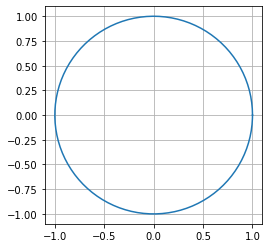

In [328]:
# This cell converts the plots imported/generated above into an xyz matrix.
# This is the format Blender will use to construct the geometry
# Two matrices are generated, one as a string and one as numeric. The string
# is then saved to an external .txt file

# ---- x / u coordinate declarations ---- #
# u = np.linspace(-4,4,200) # linear
# u = np.linspace(0,2*np.pi,200) # circular

#  ---- y / fx coordinate declarations ---- #
# default # example function
# fx = 4+np.cos(3*u)+np.sin(2*u)
    
# this displays how the Blender geometry will look when the generated mesh
# array (shown below) is executed in the bpy api in Blender.
plt.plot(x,y)

# this generates an array of arrays that contain 3 elements each. Each
# of the 3 element arrays contains an x,y,z coordinate (x[i],y[i],z=0/z[i]).
# these coordinates are converted into strings for exportation
mesh = []
mesh_string = ''
for i in range(len(x)):
    
#     string coordinates
    xyz_str = []
    xyz_str.append('<' + str(x[i]) + '<')
    xyz_str.append('<' + str(y[i]) + '<')
#     xyz_str.append('<' + str(z[i]) + '<') # uncomment if there are non-zero z coordinates
    xyz_str.append('<' + str(0) + '<') # comment out if there are non-zero z coordinates
    mesh_string += '>' + str(xyz_str) + '>'
    
#     numerical coordindats
    xyz = []
    xyz.append(x[i])
    xyz.append(y[i]) 
#     xyz.append(z[i])
    xyz.append(0)
    mesh.append(xyz)
    
print(mesh_string)

# -- this set of code saves the 'mesh' array into a text file -- #
save_mesh = open("mesh_data.txt","w")
save_mesh.write(mesh_string)
save_mesh.close()
# ------------------------------------------------------------- #

plt.axis('square')
# plt.axis([])
plt.grid()
plt.show()

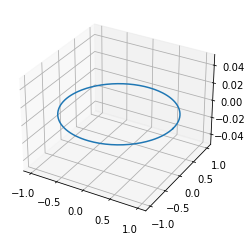

In [329]:
# 3d plot 
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x,y,z)

### Prototype Import Plots

In [283]:
# this cell opens to saved .txt file from cell above and converts it
# back into a list of lists of numbers
# This is the code block that will be used to import 
# data from this calculation , to the python script in blender that
# generates geometry

read_mesh = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\mesh_data.txt","r")
is_read = read_mesh.read()
read_mesh.close()

read_list = list(is_read.split('>>')) # converts to python array
# list_index = read_list.split('<')
new_coords = []

# print(read_list[199])

for i in range(len(read_list)-1):
    list_index = read_list[i].split('<') # converts each array element into floats, stores in new_coord array
    coords = [float(list_index[1]),float(list_index[3]),float(list_index[5])]
    new_coords.append(coords)
    
print(new_coords)


[[15937088511.088388, 6.322593942935302e-36, 0.0], [13924951133.414387, 98162557.0456134, 0.0], [10864681453.445919, 685586770.5113862, 0.0], [7468258629.205981, 1945054594.5378814, 0.0], [4398702216.488087, 3726474862.579638, 0.0], [2100870852.9127905, 5644333033.156483, 0.0], [721137577.8928132, 7235568625.775797, 0.0], [126419945.87043005, 8120008964.646157, 0.0], [1372854.750015135, 8113406087.935784, 0.0], [-17875068.207435187, 7265196341.445458, 0.0], [-219653053.82163978, 5820401997.18404, 0.0], [-738308516.4795346, 4128415396.3586454, 0.0], [-1537694585.7680762, 2534166189.851964, 0.0], [-2451322944.933382, 1287062663.9670217, 0.0], [-3257403516.3785324, 492151656.363334, 0.0], [-3759818078.028924, 111232935.31678896, 0.0], [-3848969223.3800607, 5258328.953221379, 0.0], [-3526897168.7525215, -1745432.581617471, 0.0], [-2894609062.7077184, -60206629.37122624, 0.0], [-2111519449.9098427, -252603632.20622492, 0.0], [-1343820019.2403042, -580395904.475595, 0.0], [-719176645.5996728

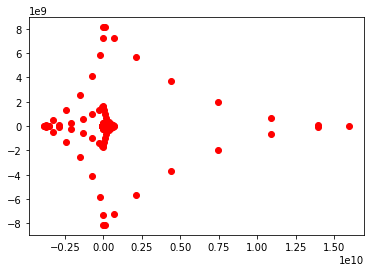

In [284]:
# experimental

# print(new_coords)

for i in new_coords:
    plt.plot(i[0],i[1],'ro')

In [280]:
# experimental
for i in new_coords:
    print(i[0])

15937088511.088388
15650147194.94071
15302253865.450039
14897448219.395819
14440240531.91698
13935546801.964947
13388620567.359518
12804982377.097023
12190347909.480268
11550555712.39629
10891495517.232603
10219038041.207483
9538967145.1563
8856915156.03296
8178302096.640321
7508279490.564296
6851679329.185162
6212968701.2685795
5596210495.315909
5005030491.903499
4442591068.993683
3911571648.9560013
3414155923.050886
2952025798.610808
2526361927.2319746
2137850590.0186627
1786696639.2497754
1472642125.6166017
1194990177.1461587
952633640.6886547
744087949.9046633
567527645.4004201
420825943.2622637
301596727.84459275
207238333.25287268
134978475.3965897
81919702.51716596
45084746.361964375
21461178.22022404
8044803.310408337
1881262.883372683
105355.1843693729
-22366.655051717473
-1082110.4457592806
-5464810.344247168
-15345820.22165786
-32662554.122081343
-59096232.71717685
-96057834.34076323
-144678289.57203552
-205802900.2082396
-279989907.560437
-367513081.99794734
-468368156.1758

In [42]:
# experimental
# print(type(new_coords[0][1]))
math1 = new_coords[0][1]
math2 = new_coords[1][0]
print(math1,math2)
print(math1+math2)

3.85449571210911 -3.959798994974874
-0.10530328286576429
